Testing pixel: (2, 2)
4-neighbors: [(1, 2), (3, 2), (2, 1), (2, 3)]


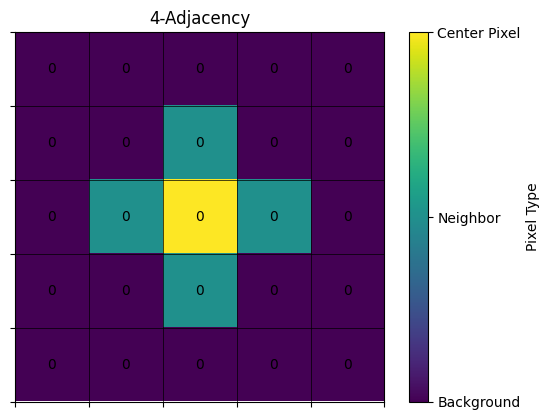

8-neighbors: [(1, 1), (1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 3)]


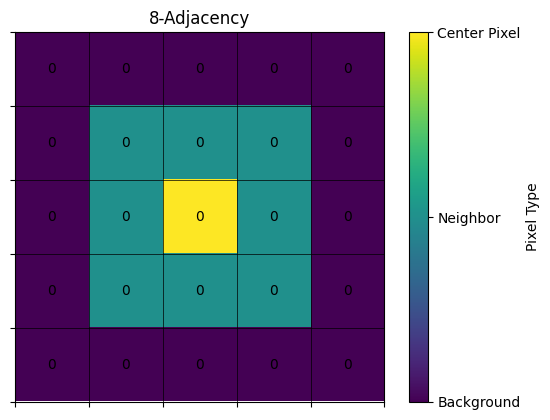


--- m-Adjacency Example ---
Grid for m-adjacency:
[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 0 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
Testing pixel for m-adjacency: (2, 2) with V_value=1
m-neighbors of (1, 1) (value 1) considering V=1: [(0, 1), (1, 2), (2, 1), (0, 0), (1, 0)]


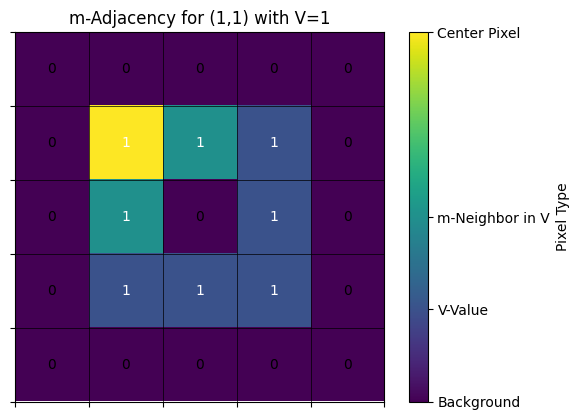

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_grid(rows, cols):
    """Creates a simple grid (image) for demonstration."""
    grid = np.zeros((rows, cols), dtype=int)
    return grid

def get_neighbors_4(r, c, rows, cols):
    """Returns the 4-neighbors of a pixel (r, c) within grid boundaries."""
    neighbors = []
    # (dr, dc) for (up, down, left, right)
    for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nr, nc = r + dr, c + dc
        # Check if neighbor is within bounds
        if 0 <= nr < rows and 0 <= nc < cols:
            neighbors.append((nr, nc))
    return neighbors

def get_neighbors_8(r, c, rows, cols):
    """Returns the 8-neighbors of a pixel (r, c) within grid boundaries."""
    neighbors = []
    # (dr, dc) for all 8 directions
    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            if dr == 0 and dc == 0:  # Skip the pixel itself
                continue
            nr, nc = r + dr, c + dc
            # Check if neighbor is within bounds
            if 0 <= nr < rows and 0 <= nc < cols:
                neighbors.append((nr, nc))
    return neighbors

def get_neighbors_m(r, c, rows, cols, V_value=1, grid=None):
    """
    Returns the m-neighbors of a pixel (r, c) within grid boundaries,
    considering pixels with value V_value as 'foreground'.
    A grid must be provided for m-adjacency.
    """
    if grid is None:
        raise ValueError("Grid must be provided for m-adjacency calculation.")

    m_neighbors = []
    # Get 4-neighbors
    four_neighbors = get_neighbors_4(r, c, rows, cols)
    for nr, nc in four_neighbors:
        m_neighbors.append((nr, nc))

    # Get diagonal neighbors
    diagonal_neighbors = []
    for dr in [-1, 1]:
        for dc in [-1, 1]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                diagonal_neighbors.append((nr, nc))

    # Check diagonal neighbors for m-adjacency condition
    for d_nr, d_nc in diagonal_neighbors:
        # Condition 2: q is a diagonal neighbor of p AND
        # the set of common 4-neighbors of p and q contains NO pixels from set V
        
        # Common 4-neighbors for (r,c) and (d_nr, d_nc) are (r, d_nc) and (d_nr, c)
        common_neighbor1_r, common_neighbor1_c = r, d_nc
        common_neighbor2_r, common_neighbor2_c = d_nr, c

        # Check if common 4-neighbors are within bounds
        is_common1_valid = 0 <= common_neighbor1_r < rows and 0 <= common_neighbor1_c < cols
        is_common2_valid = 0 <= common_neighbor2_r < rows and 0 <= common_neighbor2_c < cols

        # Check if any common 4-neighbor has the V_value
        has_v_common_neighbor = False
        if is_common1_valid and grid[common_neighbor1_r, common_neighbor1_c] == V_value:
            has_v_common_neighbor = True
        if is_common2_valid and grid[common_neighbor2_r, common_neighbor2_c] == V_value:
            has_v_common_neighbor = True

        if not has_v_common_neighbor:
            m_neighbors.append((d_nr, d_nc))

    return list(set(m_neighbors)) # Use set to remove duplicates if any, then convert back to list

def visualize_adjacency(grid, pixel_r, pixel_c, neighbors, title):
    """Visualizes the pixel and its neighbors on a grid."""
    rows, cols = grid.shape
    display_grid = np.copy(grid).astype(float) # Use float for colors

    # Mark the central pixel
    display_grid[pixel_r, pixel_c] = 2 # A distinct value for the center pixel

    # Mark neighbors
    for nr, nc in neighbors:
        display_grid[nr, nc] = 1 # A distinct value for neighbors

    plt.imshow(display_grid, cmap='viridis', origin='upper')
    plt.title(title)
    plt.colorbar(ticks=[0, 1, 2], label='Pixel Type').set_ticklabels(['Background', 'Neighbor', 'Center Pixel'])
    plt.xticks(np.arange(-0.5, cols, 1), [])
    plt.yticks(np.arange(-0.5, rows, 1), [])
    plt.grid(True, which='both', color='black', linewidth=0.5)
    for x in range(cols):
        for y in range(rows):
            plt.text(x, y, str(grid[y, x]), ha='center', va='center', color='black' if grid[y,x] == 0 else 'white')
    plt.show()

# --- Example Usage ---
rows, cols = 5, 5
test_grid = create_grid(rows, cols)

# Set a central pixel to test adjacency
center_pixel_r, center_pixel_c = 2, 2
test_grid[center_pixel_r, center_pixel_c] = 0 # Foreground value (can be anything, 0 here for clarity)

print(f"Testing pixel: ({center_pixel_r}, {center_pixel_c})")

# 4-Adjacency
neighbors_4 = get_neighbors_4(center_pixel_r, center_pixel_c, rows, cols)
print(f"4-neighbors: {neighbors_4}")
visualize_adjacency(test_grid, center_pixel_r, center_pixel_c, neighbors_4, "4-Adjacency")

# 8-Adjacency
neighbors_8 = get_neighbors_8(center_pixel_r, center_pixel_c, rows, cols)
print(f"8-neighbors: {neighbors_8}")
visualize_adjacency(test_grid, center_pixel_r, center_pixel_c, neighbors_8, "8-Adjacency")

# m-Adjacency Example
print("\n--- m-Adjacency Example ---")
m_adjacency_grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0], # Center pixel (2,2) has value 0
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])
# Let's say our 'V' set is for pixels with value 1 (white pixels)
# We want to find m-neighbors of the pixel at (2,2) which has a value of 0.
m_center_pixel_r, m_center_pixel_c = 2, 2
V_value_for_m = 1 # We are interested in connectivity of '1' valued pixels

print(f"Grid for m-adjacency:\n{m_adjacency_grid}")
print(f"Testing pixel for m-adjacency: ({m_center_pixel_r}, {m_center_pixel_c}) with V_value={V_value_for_m}")

# In this specific example, the center pixel is 0. If it were 1, its neighbors of 1 would be found.
# Let's try finding m-neighbors for a '1' valued pixel, say (1,1)
target_r, target_c = 1, 1
target_pixel_val = m_adjacency_grid[target_r, target_c]

# To properly demonstrate m-adjacency, we should typically define V and look for neighbors
# that are also in V. For simplicity, let's find all pixels that would be m-adjacent *if they were* in V.
# The definition of m-adjacency implicitly considers foreground pixels (V).
# We'll calculate it based on the condition that common 4-neighbors of p and q should NOT be in V.
# Here, 'V_value' refers to the value of "foreground" pixels.

m_neighbors = get_neighbors_m(target_r, target_c, rows, cols, V_value=V_value_for_m, grid=m_adjacency_grid)
print(f"m-neighbors of ({target_r}, {target_c}) (value {target_pixel_val}) considering V={V_value_for_m}: {m_neighbors}")

# Let's create a visualization specific to m-adjacency to highlight the 'V' set.
# Mark pixels in V_value as green, center pixel as red, m-neighbors as blue.
m_display_grid = np.copy(m_adjacency_grid).astype(float)

# Mark V_value pixels (foreground)
m_display_grid[m_adjacency_grid == V_value_for_m] = 0.5 # A mid-range value for V

# Mark the central pixel
m_display_grid[target_r, target_c] = 2.0 # Red for center

# Mark m-neighbors (that are also in V) - this is how it's typically used for connectivity
for nr, nc in m_neighbors:
    if m_adjacency_grid[nr, nc] == V_value_for_m: # Only mark neighbors that are part of the 'V' set
        m_display_grid[nr, nc] = 1.0 # Blue for m-adjacent foreground pixels

plt.imshow(m_display_grid, cmap='viridis', origin='upper')
plt.title(f"m-Adjacency for ({target_r},{target_c}) with V={V_value_for_m}")
plt.colorbar(ticks=[0, 0.5, 1.0, 2.0], label='Pixel Type').set_ticklabels(['Background', 'V-Value', 'm-Neighbor in V', 'Center Pixel'])
plt.xticks(np.arange(-0.5, cols, 1), [])
plt.yticks(np.arange(-0.5, rows, 1), [])
plt.grid(True, which='both', color='black', linewidth=0.5)
for x in range(cols):
    for y in range(rows):
        plt.text(x, y, str(m_adjacency_grid[y, x]), ha='center', va='center', color='black' if m_adjacency_grid[y,x] == 0 else 'white')
plt.show()